<a href="https://colab.research.google.com/github/lalxth/Digit_Recognition_usinf_Tensorflow_with_Mnist_Dataset/blob/main/Digit_Recognition_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digit Recognition Problem using Tensorflow with Mnist Dataset

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import platform
import datetime
import math

print("Python Version:", platform.python_version())
print("Tensorflow Version:" , tf.__version__)
print("Keras Version:" , tf.keras.__version__)

Python Version: 3.9.16
Tensorflow Version: 2.11.0
Keras Version: 2.11.0


In [ ]:
%load_ext tensorboard

In [ ]:
mnist_dataset = tf.keras.datasets.mnist
(x_train , y_train),(x_test , y_test)= mnist_dataset.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("x_train:", x_train.shape)
print("y_train:" , y_train.shape)
print("x_test:" , x_test.shape)
print("y_test:" , y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [ ]:
(_,img_height,img_width) = x_train.shape
img_channel = 1

print("Image_Height:", img_height)
print("Image_Width:", img_width)
print("Image_Channel:" , img_channel)

Image_Height: 28
Image_Width: 28
Image_Channel: 1


In [ ]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


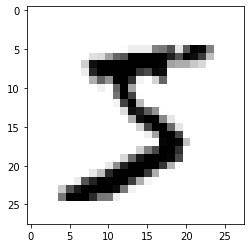

In [ ]:
plt.imshow(x_train[0] , cmap = plt.cm.binary)
plt.show()

In [ ]:
x_train_with_channel = x_train.reshape(x_train.shape[0],img_height,img_width,img_channel)
x_test_with_channel = x_test.reshape(x_test.shape[0],img_height,img_width,img_channel)


print("x_train_with_channel:" , x_train_with_channel.shape)
print("x_test_with_channel:", x_test_with_channel.shape)


x_train_with_channel: (60000, 28, 28, 1)
x_test_with_channel: (10000, 28, 28, 1)


In [ ]:
x_train_normalise = x_train_with_channel / 255
x_test_normalise = x_test_with_channel / 255

In [ ]:
x_train_normalise[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [89]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(
    input_shape = (img_height,img_width,img_channel),
    kernel_size = 5,
    filters = 8,
    strides = 1,
    activation = tf.keras.activations.relu ,
    kernel_initializer = tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPool2D(
    pool_size = (2,2),
    strides = (2,2)
))

model.add(tf.keras.layers.Conv2D(
    kernel_size = 5,
    filters = 16,
    strides = 1,
    activation = tf.keras.activations.relu ,
    kernel_initializer = tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPool2D(
    pool_size = (2,2),
    strides = (2,2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units = 128 ,
    activation = tf.keras.activations.relu
))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units = 10,
    activation = tf.keras.activations.softmax,
    kernel_initializer = tf.keras.initializers.VarianceScaling()
))

In [90]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 12, 12, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 4, 4, 16)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)             

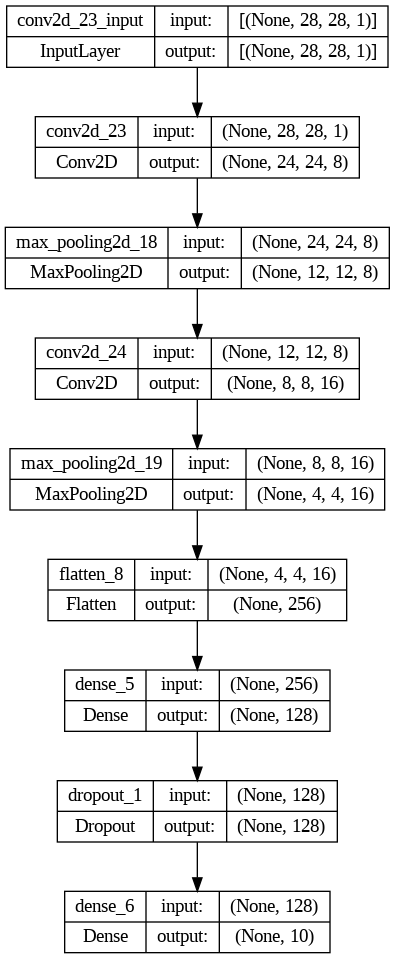

In [ ]:
tf.keras.utils.plot_model( model ,show_shapes = True , show_layer_names = True)

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

model.compile(
    optimizer = adam_optimizer ,
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics =['accuracy']
)

In [ ]:
log_dir = ".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir , histogram_freq =1)

training_history = model.fit(
    x_train_normalise ,
    y_train ,
    epochs = 10 ,
    validation_data = (x_train_normalise , y_train),
    callbacks = [tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1970 - accuracy: 0.9382 - val_loss: 0.0614 - val_accuracy: 0.9806
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0680 - accuracy: 0.9793 - val_loss: 0.0429 - val_accuracy: 0.9858
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0502 - accuracy: 0.9843 - val_loss: 0.0259 - val_accuracy: 0.9922
Epoch 4/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0381 - accuracy: 0.9880 - val_loss: 0.0238 - val_accuracy: 0.9925
Epoch 5/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0322 - accuracy: 0.9902 - val_loss: 0.0229 - val_accuracy: 0.9929
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0277 - accuracy: 0.9918 - val_loss: 0.0159 - val_accuracy: 0.9950
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.0153 -

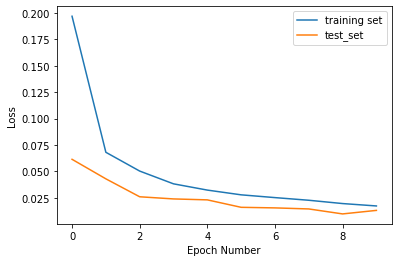

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label ="training set")
plt.plot(training_history.history['val_loss'] , label="test_set")
plt.legend()

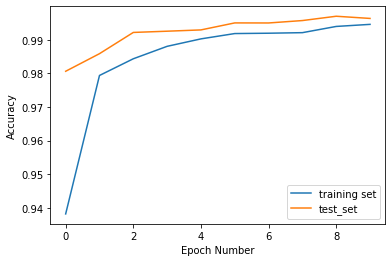

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label ="training set")
plt.plot(training_history.history['val_accuracy'] , label="test_set")
plt.legend()

In [ ]:
%%capture

train_loss , train_accuracy = model.evaluate(x_train_normalise , y_train)



In [ ]:
print("Training Loss:" , train_loss)
print("Training Accuray:" , train_accuracy)

Training Loss: 0.012939573265612125
Training Accuray: 0.99631667137146


In [ ]:
%%capture

test_loss , test_accuracy = model.evaluate(x_test_normalise , y_test)


In [ ]:
print("Testing Loss:" , test_loss)
print("Testing Accuracy:" , test_accuracy)

Testing Loss: 0.045524124056100845
Testing Accuracy: 0.9866999983787537


In [ ]:
model_name = "digits_recognition_cnn.h5"
model.save(model_name , save_format ='h5')

In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

In [ ]:
predict_one_hot = loaded_model.predict([x_test_normalise])

313/313 [==============================] - 3s 9ms/step


In [ ]:
print("Predicted one hot", predict_one_hot.shape)

Predicted one hot (10000, 10)


In [ ]:
pd.DataFrame(predict_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,8.108255e-17,3.009640e-10,4.151649e-11,1.275800e-09,1.795520e-07,4.513135e-15,1.739601e-18,9.999997e-01,1.586980e-13,2.685672e-09
1,5.510793e-12,1.806668e-11,9.999999e-01,2.266077e-15,3.812799e-15,2.134440e-24,4.321341e-15,2.668737e-15,1.024285e-15,5.679095e-18
2,2.382877e-10,9.999951e-01,9.438583e-10,1.055271e-11,1.575271e-06,9.928171e-08,2.740642e-09,3.230474e-06,5.077986e-08,4.775777e-09
3,9.999891e-01,1.601395e-11,6.849825e-12,5.026241e-11,1.647330e-11,1.601299e-09,1.078994e-05,1.006391e-09,3.649786e-08,4.472730e-09
4,1.988441e-12,1.548734e-09,7.343936e-12,5.356562e-14,9.999999e-01,1.389842e-10,4.123068e-11,1.356042e-10,2.663505e-11,1.492322e-08
...,...,...,...,...,...,...,...,...,...,...
9995,3.380553e-16,3.883281e-07,9.999993e-01,4.215810e-08,1.572411e-14,1.720807e-21,1.130480e-14,1.266423e-07,1.939474e-09,1.744687e-15
9996,2.053842e-13,1.506224e-09,4.879387e-12,9.999999e-01,2.384121e-17,1.566047e-08,1.111804e-15,2.823470e-13,4.812109e-13,1.220561e-14
9997,3.592875e-24,2.109086e-10,2.044160e-18,6.798069e-20,9.999999e-01,1.935529e-16,1.927585e-17,2.752929e-14,1.917434e-14,7.588497e-16
9998,1.494643e-12,1.920336e-15,2.334868e-19,2.400152e-11,8.405441e-23,9.999999e-01,1.786599e-13,3.851251e-19,2.842655e-08,1.847098e-17


In [ ]:
predictions = np.argmax(predict_one_hot , axis = 1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [ ]:
print(predictions[5])

1


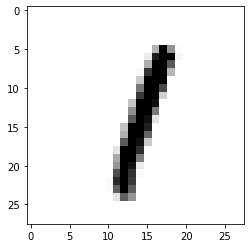

In [ ]:
plt.imshow(x_test_normalise[5].reshape((img_height , img_width)) , cmap=plt.cm.binary)
plt.show()

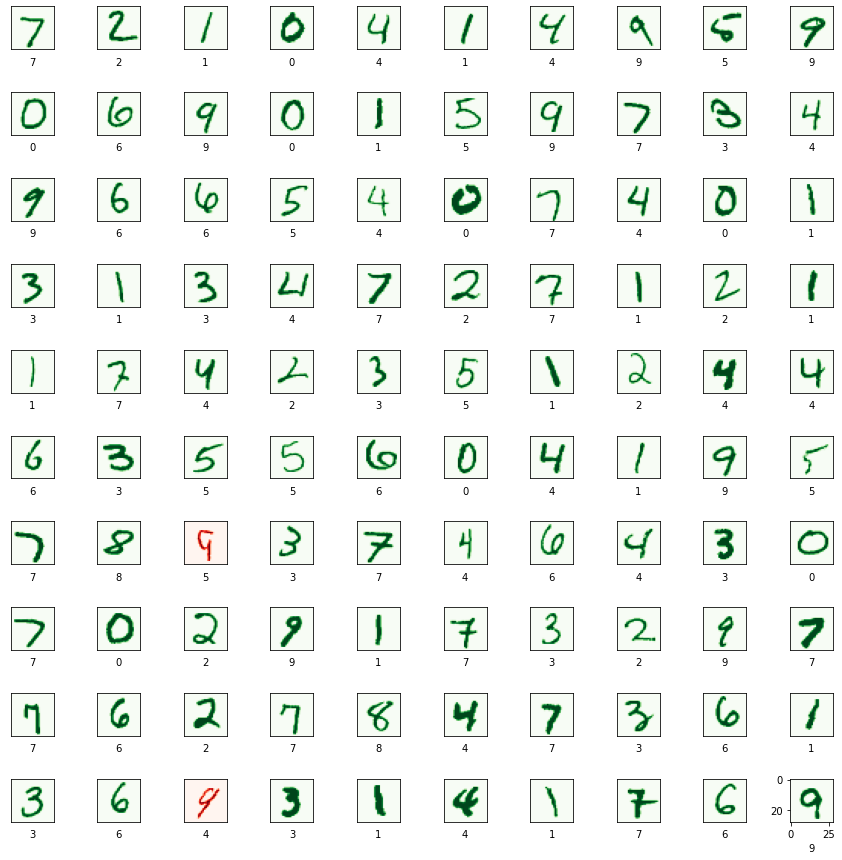

In [ ]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15,15))

for plot_index in range(numbers_to_display):
  predicted_label = predictions[plot_index]
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
  plt.subplot(num_cells , num_cells , plot_index + 1)
  plt.imshow(x_test_normalise[plot_index].reshape((img_height,img_width)) , cmap = color_map)
  plt.xlabel(predicted_label)

plt.subplots_adjust(hspace = 1 , wspace = 0.5)
plt.show()